In [10]:
from bagpy import bagreader
import pandas as pd
import numpy as np
from scipy.spatial.transform import Rotation as R

# Initialize an empty DataFrame to store the results
global_df = pd.DataFrame()

# Iterate over the different heights
for height in ['ground', '10cm', '30cm']:
    # Path to your ROS bag file (modify based on the height)
    bag_file = f'bags/tof_imu_altitude_nodes_characterization_{height}.bag'
    
    # Read the bag into a pandas dataframe
    b = bagreader(bag_file)

    # Iterate over each topic in the ROS bag
    for topic_name in b.topic_table['Topics']:
        df = pd.read_csv(b.message_by_topic(topic_name))

        if b.topic_table[b.topic_table['Topics'] == topic_name]['Types'].values[0] == 'sensor_msgs/Range':
            # ToF data (distance)
            mean = df['range'].mean()
            std = df['range'].std()
            rsd = (std / np.abs(mean)) * 100 if mean != 0 else np.nan
            
            # Add the result to global_df using pd.concat
            global_df = pd.concat([global_df, pd.DataFrame({
                'Height': [height],
                'Quantity': ['ToF Distance (m)'],
                'Mean': [mean],
                'Standard Deviation': [std],
                'RSD (%)': [rsd]
            })], ignore_index=True)

        if b.topic_table[b.topic_table['Topics'] == topic_name]['Types'].values[0] == 'sensor_msgs/Imu':
            # Compute the mean, standard deviation, and relative standard deviation for IMU data
            for axis in ['x', 'y', 'z']:
                # Linear Acceleration
                mean = df[f'linear_acceleration.{axis}'].mean()
                std = df[f'linear_acceleration.{axis}'].std()
                rsd = (std / np.abs(mean)) * 100 if mean != 0 else np.nan
                
                # Add to global_df using pd.concat
                global_df = pd.concat([global_df, pd.DataFrame({
                    'Height': [height],
                    'Quantity': [f'Linear Acceleration {axis.upper()} (m/s^2)'],
                    'Mean': [mean],
                    'Standard Deviation': [std],
                    'RSD (%)': [rsd]
                })], ignore_index=True)

                # Angular Velocity
                mean = df[f'angular_velocity.{axis}'].mean()
                std = df[f'angular_velocity.{axis}'].std()
                rsd = (std / np.abs(mean)) * 100 if mean != 0 else np.nan
                
                # Add to global_df using pd.concat
                global_df = pd.concat([global_df, pd.DataFrame({
                    'Height': [height],
                    'Quantity': [f'Angular Velocity {axis.upper()} (rad/s)'],
                    'Mean': [mean],
                    'Standard Deviation': [std],
                    'RSD (%)': [rsd]
                })], ignore_index=True)

            # Orientation (Quaternion -> Euler)
            quaternions = df[['orientation.w', 'orientation.x', 'orientation.y', 'orientation.z']].to_numpy()
            rot = R.from_quat(quaternions)
            euler_angles = rot.as_euler('zyx', degrees=True)  # Convert to degrees (roll, pitch, yaw)

            # Add Euler angles to the DataFrame
            df['roll'] = euler_angles[:, 0]
            df['pitch'] = euler_angles[:, 1]
            df['yaw'] = euler_angles[:, 2]

            # Compute the mean, std, and rsd for roll, pitch, yaw
            for axis in ['roll', 'pitch', 'yaw']:
                mean = df[axis].mean()
                std = df[axis].std()
                rsd = (std / np.abs(mean)) * 100 if mean != 0 else np.nan
                
                # Add to global_df using pd.concat
                global_df = pd.concat([global_df, pd.DataFrame({
                    'Height': [height],
                    'Quantity': [f'{axis.capitalize()} (Euler) (degrees)'],
                    'Mean': [mean],
                    'Standard Deviation': [std],
                    'RSD (%)': [rsd]
                })], ignore_index=True)

# Convert the DataFrame to LaTeX format
latex_table = global_df.to_latex(index=False, caption='IMU and ToF Mean and Standard Deviation at Different Heights')

global_df

# # Optionally save the LaTeX table to a file
# with open("imu_tof_stats_table.tex", "w") as f:
#     f.write(latex_table)


[INFO]  Data folder bags/tof_imu_altitude_nodes_characterization_ground already exists. Not creating.
[INFO]  Data folder bags/tof_imu_altitude_nodes_characterization_10cm already exists. Not creating.
[INFO]  Data folder bags/tof_imu_altitude_nodes_characterization_30cm already exists. Not creating.


Height                       Quantity          Mean  Standard Deviation  \
0   ground               ToF Distance (m)  9.161251e-03            0.001520   
1   ground  Linear Acceleration X (m/s^2)  7.937463e-02            0.007406   
2   ground     Angular Velocity X (rad/s)  4.894891e-05            0.000705   
3   ground  Linear Acceleration Y (m/s^2) -1.875769e-03            0.004262   
4   ground     Angular Velocity Y (rad/s) -8.704940e-06            0.000803   
5   ground  Linear Acceleration Z (m/s^2)  9.781409e+00            0.008905   
6   ground     Angular Velocity Z (rad/s) -4.963900e-05            0.000701   
7   ground         Roll (Euler) (degrees) -4.873343e-01            0.015122   
8   ground        Pitch (Euler) (degrees) -3.909447e-02            0.012370   
9   ground          Yaw (Euler) (degrees)  9.001977e+01            0.012463   
10    10cm               ToF Distance (m)  1.070409e-01            0.003052   
11    10cm  Linear Acceleration X (m/s^2)  1.417686e-01            0.006827   
12    10cm     Angular Velocity X (rad/s)  3.624383e-05            0.000719   
13    10cm  Linear Acceleration Y (m/s^2)  4.096744e-01            0.008515   
14    10cm     Angular Velocity Y (rad/s) -6.310552e-05            0.000737   
15    10cm  Linear Acceleration Z (m/s^2)  9.768082e+00            0.009834   
16    10cm     Angular Velocity Z (rad/s)  6.695765e-04            0.000811   
17    10cm         Roll (Euler) (degrees)  7.953180e-01            0.018667   
18    10cm        Pitch (Euler) (degrees) -2.440428e+00            0.014204   
19    10cm          Yaw (Euler) (degrees) -9.140129e+01            0.148169   
20    30cm               ToF Distance (m)  2.141231e-01            0.003517   
21    30cm  Linear Acceleration X (m/s^2)  1.641791e-01            0.007041   
22    30cm     Angular Velocity X (rad/s) -4.668271e-06            0.000766   
23    30cm  Linear Acceleration Y (m/s^2)  7.354329e-01            0.007375   
24    30cm     Angular Velocity Y (rad/s)  3.169946e-06            0.000810   
25    30cm  Linear Acceleration Z (m/s^2)  9.747646e+00            0.008534   
26    30cm     Angular Velocity Z (rad/s)  3.753597e-07            0.000698   
27    30cm         Roll (Euler) (degrees)  7.578393e-01            0.010827   
28    30cm        Pitch (Euler) (degrees) -4.388716e+00            0.018081   
29    30cm          Yaw (Euler) (degrees) -9.284852e+01            0.022933   

          RSD (%)  
0       16.586255  
1        9.329919  
2     1439.765032  
3      227.213548  
4     9225.931662  
5        0.091036  
6     1411.696511  
7        3.102968  
8       31.640950  
9        0.013845  
10       2.851265  
11       4.815511  
12    1984.576564  
13       2.078575  
14    1168.170617  
15       0.100675  
16     121.048166  
17       2.347080  
18       0.582029  
19       0.162108  
20       1.642323  
21       4.288623  
22   16418.709376  
23       1.002852  
24   25539.606246  
25       0.087549  
26  185971.763292  
27       1.428660  
28       0.411982  
29       0.024699

# Measuring the frequency of topics

The frequency of the measurements of the IMU and Time of Flight sensors is measured using the `rostopic hz` command. The following image contains the output of the command:

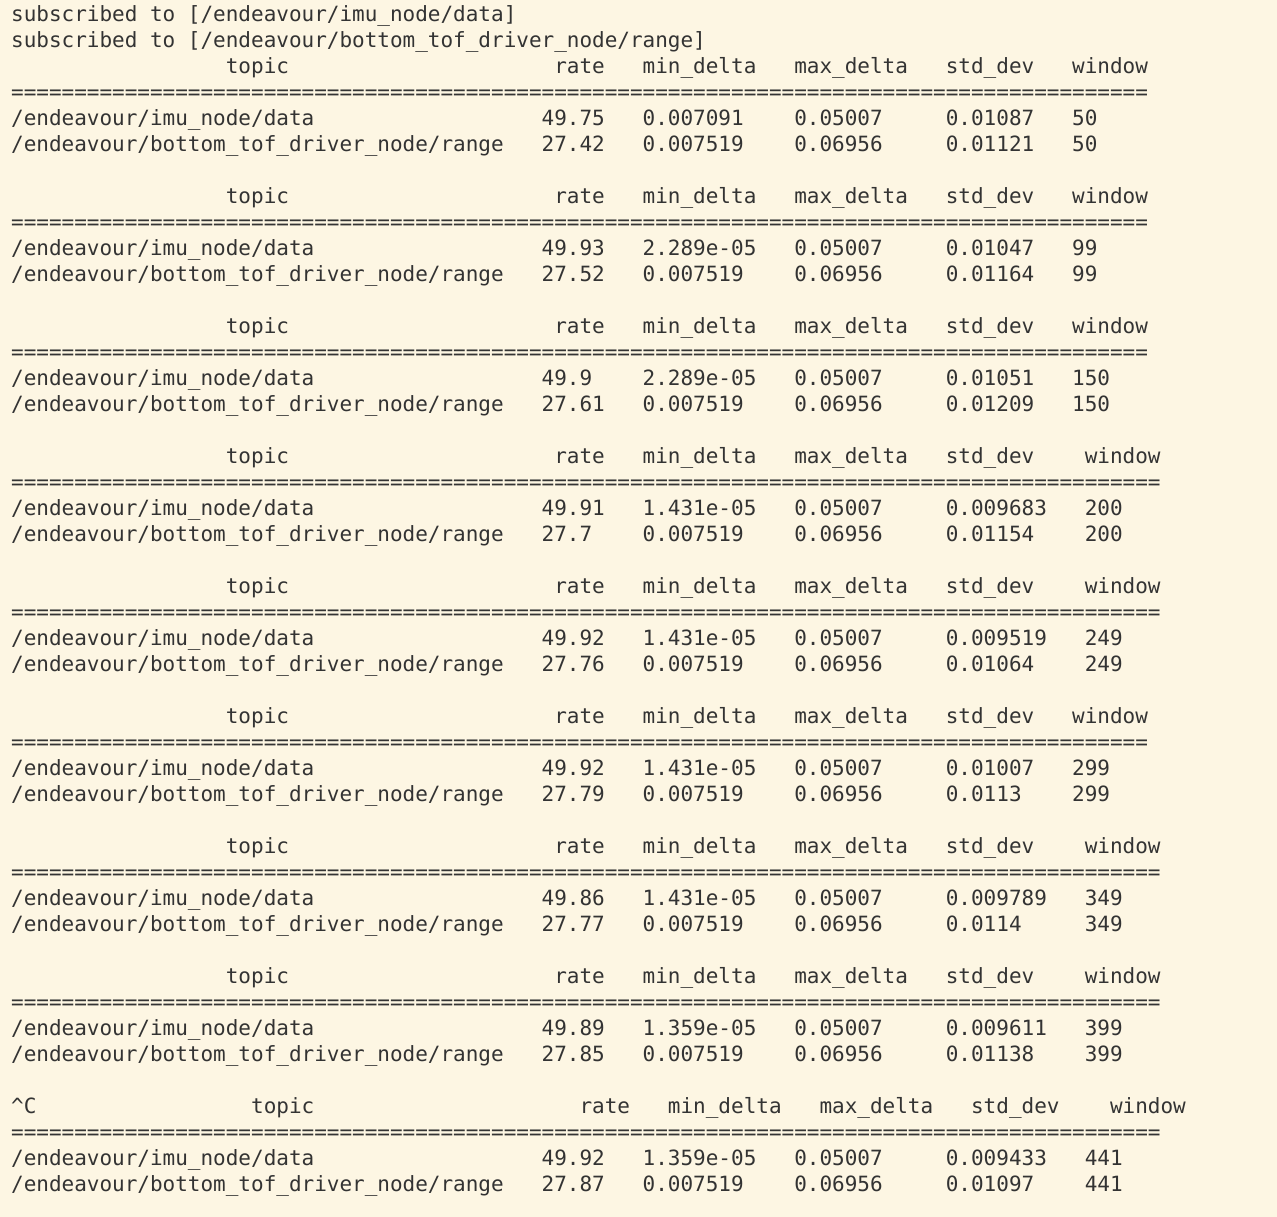

As visible in the image the frequencies have small standard deviations compared to the average rate.

# Optical flow node

We characterize the optical flow (visual odometry) node. This node takes as input images from the camera and compute the motion vectors that measure the displacements of the same pixels in two consecutive frames. Then these are projected to the ground and the velocity vector of the drone is estimated by averaging them out.

In [11]:
from bagpy import bagreader
import pandas as pd

# Read the bag file
b = bagreader('bags/visual_odometry_pi4.bag')

# Display available topics in the bag
print(b.topic_table)

# Image resolution 80x60

[INFO]  Data folder bags/visual_odometry_pi4 already exists. Not creating.
                                         Topics              Types  \
0  /discovery/optical_flow_node/visual_odometry  nav_msgs/Odometry   

   Message Count  Frequency  
0            569  22.030932  


In [12]:
# Read the messages from the odometry topic into a DataFrame
df = pd.read_csv(b.message_by_topic('/discovery/optical_flow_node/visual_odometry'))
df.head()

Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0  1.728919e+09         106         1728919025           388629913   
1  1.728919e+09         107         1728919025           400483608   
2  1.728919e+09         108         1728919025           447802305   
3  1.728919e+09         109         1728919025           486254692   
4  1.728919e+09         110         1728919025           526651382   

   header.frame_id child_frame_id  pose.pose.position.x  pose.pose.position.y  \
0              NaN      base_link                   0.0                   0.0   
1              NaN      base_link                   0.0                   0.0   
2              NaN      base_link                   0.0                   0.0   
3              NaN      base_link                   0.0                   0.0   
4              NaN      base_link                   0.0                   0.0   

   pose.pose.position.z  pose.pose.orientation.x  ...  \
0                   0.0                      0.0  ...   
1                   0.0                      0.0  ...   
2                   0.0                      0.0  ...   
3                   0.0                      0.0  ...   
4                   0.0                      0.0  ...   

   pose.pose.orientation.z  pose.pose.orientation.w  \
0                      0.0                      0.0   
1                      0.0                      0.0   
2                      0.0                      0.0   
3                      0.0                      0.0   
4                      0.0                      0.0   

                                     pose.covariance twist.twist.linear.x  \
0  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...             0.001310   
1  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...            -0.000963   
2  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...             0.000347   
3  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...            -0.001758   
4  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...             0.001492   

   twist.twist.linear.y  twist.twist.linear.z  twist.twist.angular.x  \
0              0.011603                   0.0                    0.0   
1             -0.006605                   0.0                    0.0   
2              0.024868                   0.0                    0.0   
3             -0.003686                   0.0                    0.0   
4             -0.016452                   0.0                    0.0   

   twist.twist.angular.y  twist.twist.angular.z  \
0                    0.0                    0.0   
1                    0.0                    0.0   
2                    0.0                    0.0   
3                    0.0                    0.0   
4                    0.0                    0.0   

                                    twist.covariance  
0  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  

[5 rows x 21 columns]

In [13]:

# Compute mean and standard deviation for the linear velocities
for axis in ['x', 'y', 'z']:
    linear_mean = df[f'twist.twist.linear.{axis}'].mean()
    linear_std = df[f'twist.twist.linear.{axis}'].std()

    if axis == 'z':
        assert linear_mean == 0, "[WARNING] Linear velocity in z-axis should be zero!"
    
    print(f"Linear Velocity {axis.upper()}: Mean = {linear_mean:.5f}, Std = {linear_std:.5f}")


Linear Velocity X: Mean = 0.00039, Std = 0.00270
Linear Velocity Y: Mean = 0.00109, Std = 0.01113
Linear Velocity Z: Mean = 0.00000, Std = 0.00000


# Understanding the optical flow pipeline

In the following examples we test the optical flow velocity estimation pipeline in a DD24 in the Duckiematrix.

The DD24 is moved in a circular trajectory with angular velocity $\omega=1$ `rad/s` and radius `R=0.5 m`.

## 1. Motion vector computation

The motion vectors are computed on a scaled-down image from the front camera. The scaling factor is `0.0625`, which using a `640x480` image results in a `40x30` pixels image. The motion vectors are computed at 6 equally spaced locations in the image, starting at location `(0,0)` (upper-left corner of the image).



Let's analyze the output of this node.

In [14]:
# Import the optical flow bag file
b = bagreader('bags/optical_flows_20cm.bag')

# Parameters of the imposed circular trajectory
omega = 1.0 # Angular velocity (rad/s)
R = 0.5     # Radius of the circle (m)

# Display available topics in the bag
print(b.topic_table)

[INFO]  Data folder bags/optical_flows_20cm already exists. Not creating.
                                              Topics  \
0            /virtualendeavour/fback_flow_node/flows   
1  /virtualendeavour/optical_flow_node/visual_odo...   

                          Types  Message Count  Frequency  
0  opencv_apps/FlowArrayStamped            732  27.729469  
1             nav_msgs/Odometry            732  27.620818  


In [15]:
# Read the messages from the optical flow topic into a DataFrame
df = pd.read_csv(b.message_by_topic('/virtualendeavour/fback_flow_node/flows'))

df.head()
# df.flow[0]

Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0  1.730213e+09       17205         1730212503           490901470   
1  1.730213e+09       17206         1730212503           523418188   
2  1.730213e+09       17207         1730212503           573256492   
3  1.730213e+09       17208         1730212503           609629154   
4  1.730213e+09       17209         1730212503           659132003   

   header.frame_id                                               flow  
0              NaN  [point: \n  x: 0.0\n  y: 0.0\nvelocity: \n  x:...  
1              NaN  [point: \n  x: 0.0\n  y: 0.0\nvelocity: \n  x:...  
2              NaN  [point: \n  x: 0.0\n  y: 0.0\nvelocity: \n  x:...  
3              NaN  [point: \n  x: 0.0\n  y: 0.0\nvelocity: \n  x:...  
4              NaN  [point: \n  x: 0.0\n  y: 0.0\nvelocity: \n  x:...

In [16]:
import re

def parse_flow_data(row):
    pattern = r"point:\s+x:\s*([\d\.\-]+)\s+y:\s*([\d\.\-]+)\s*velocity:\s+x:\s*([\d\.\-]+)\s+y:\s*([\d\.\-]+)"
    matches = re.findall(pattern, row)
    if matches:
        return matches
    return []

# Apply the parsing function to each row in the DataFrame and expand the results into a new DataFrame
parsed_data = df['flow'].apply(parse_flow_data)
parsed_flat = [item for sublist in parsed_data for item in sublist]  # Flatten the list of lists

# Convert to DataFrame
data = pd.DataFrame(parsed_flat, columns=['point_x', 'point_y', 'velocity_x', 'velocity_y'])
data = data.astype(float)

data.head()

point_x  point_y  velocity_x  velocity_y
0      0.0      0.0    0.511048   -0.566869
1     16.0      0.0   -0.637861    0.609915
2     32.0      0.0   -1.073501   -1.272365
3      0.0     16.0   -0.803545    0.245926
4     16.0     16.0   -0.597425    0.210223

In [17]:
import matplotlib.pyplot as plt

# Group data into batches of 6 rows
n = 6  # Number of rows per group
mean_velocity = data.groupby(np.arange(len(data)) // n).mean().reset_index(drop=True)

# The measurements are in pixels per frame, so we need to convert to pixels per second by using the frame rate
frame_rate = b.frequency[0]

mean_velocity['velocity_x'] *= frame_rate
mean_velocity['velocity_y'] *= frame_rate

# We also want to scale it using the image scaling factor
SCALING_FACTOR = 0.0625

mean_velocity['velocity_x'] /= SCALING_FACTOR
mean_velocity['velocity_y'] /= SCALING_FACTOR

print(mean_velocity)


     point_x  point_y  velocity_x  velocity_y
0       16.0      8.0 -209.880426  -19.143562
1       16.0      8.0 -264.497109   28.884285
2       16.0      8.0 -220.263085  224.898419
3       16.0      8.0 -313.375704   63.773140
4       16.0      8.0 -150.598672  225.270679
..       ...      ...         ...         ...
725     16.0      8.0  336.076948   33.559558
726     16.0      8.0  308.520912   98.822455
727     16.0      8.0  285.908190  137.072877
728     16.0      8.0  378.535634   54.684362
729     32.0     16.0  234.727234  100.973317

[730 rows x 4 columns]


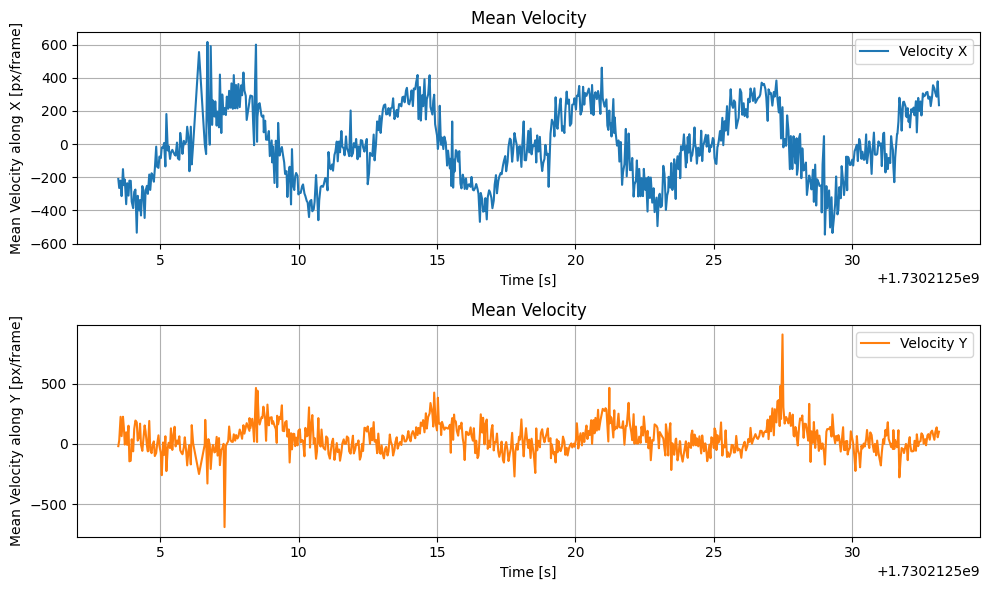

In [18]:
# Plotting

plt.figure(figsize=(10, 6))

# Plot velocity_x
plt.subplot(2, 1, 1)
plt.plot(df['Time'][:-2], mean_velocity['velocity_x'], linestyle='-', label='Velocity X')
plt.xlabel('Time [s]')
plt.ylabel('Mean Velocity along X [px/frame]')
plt.title('Mean Velocity')
plt.grid(True)
plt.legend()

# Plot velocity_y
plt.subplot(2, 1, 2)
plt.plot(df['Time'][:-2], mean_velocity['velocity_y'], linestyle='-', label='Velocity Y', color='tab:orange')
plt.xlabel('Time [s]')
plt.ylabel('Mean Velocity along Y [px/frame]')
plt.title('Mean Velocity')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
# Sanity check: let's see if the period of the oscillations is consistent with the imposed motion
T = 2 * np.pi / omega  # Period of the circular trajectory
t = np.linspace(0, T, len(mean_velocity))

# Compute the period of the experimental data by measuring the time difference between two peaks and multiplying by 2
period = 2 * (t[mean_velocity['velocity_x'].idxmax()] - t[0])

print(f"Period of the imposed circular trajectory: {T:.2f} s")

Period of the imposed circular trajectory: 6.28 s


It is possible to see visually that the period of the oscillations in the computed velocity is similar to the period of the imposed trajectory.

# VIO output

Finally we plot the velocity output of the VIO pipeline and compare it with the velocity components of the imposed circular trajectory.

In [1]:
topic_name = "/virtualendeavour/optical_flow_node/visual_odometry"

# Read the messages from the optical flow topic into a DataFrame
df = pd.read_csv(b.message_by_topic(topic_name))

df.head()

# Smooth out the dataframe using a rolling window
df['twist.twist.linear.x'] = df['twist.twist.linear.x'].rolling(window=30).mean()
df['twist.twist.linear.y'] = df['twist.twist.linear.y'].rolling(window=30).mean()

# Plot the smoothed data
df.plot(x='Time', y='twist.twist.linear.x', title='Smoothed Linear Velocity X', xlabel='Time [s]', ylabel='Velocity [m/s]', grid=True)
df.plot(x='Time', y='twist.twist.linear.y', title='Smoothed Linear Velocity Y', xlabel='Time [s]', ylabel='Velocity [m/s]', grid=True)

tangential_velocity = omega * R  # Tangential velocity of the circular trajectory (also the maximum component of the linear velocity)
print(f"Tangential velocity of the circular trajectory: {tangential_velocity:.2f} m/s")
plt.tight_layout()

# TODO: Plot the velocity in the x and y directions from the circular trajectory


NameError: name 'pd' is not defined